# Chapter 10: Random Forest

โค้ดตัวอย่างการสร้างโมเดล Random Forest (RF) ในการจำแนกประเภทดอกไอริสจากฟีเจอร์ ตัวอย่างนี้ใช้ชุดข้อมูล [Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) โค้ดถูกเขียนโดยใช้ไลบรารี่ [`scikit-learn`](https://scikit-learn.org/)

**Reference**: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

### ขั้นตอน
1. Import Package and Module
2. Load Dataset
3. Train RF model
4. Model Evaluation
5. Discussion

## 1. Import Package and Module

ทำการนำเข้าแพ็กเกจและโมดูลที่จำเป็นต้องใช้อย่าง scikit-learn (sklearn) และ Keras ส่วน Matplotlib ใช้สำหรับแสดงผล

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 2. Load Dataset

ทำการโหลดชุดข้อมูล Iris Dataset ซึ่งประกอบไปด้วยตัวอย่าง 150 ตัวอย่าง จากดอกไอริส 3 ประเภท คือ Setosa, Versicolour, และ Virginica ชนิดละ 50 ตัวอย่าง โดยแต่ละตัวอย่างจะมีฟีเจอร์ 4 อย่างคือ Sepal Length, Sepal Width, Petal Length and Petal Width

แล้วทำการแบ่งชุดข้อมูลเป็น ชุดข้อมูลสอน (Training Data) และชุดข้อมูลทดสอบ (Test Data) ที่อัตราส่วน 60:40 และแบ่งแบบ Stratified Sampling เพื่อให้ข้อมูลทดสอบในแต่ละกลุ่มมีจำนวนใกล้เคียงกัน

In [2]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)

## 3. Train RF model

เริ่มต้นจากการกำหนด Hyperparameter ของ [`Random Forest`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) โดยในที่นี้จะใช้ค่าตั้งต้น แล้วเรียกฟังก์ชัน [`fit`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.fit) เพื่อสร้างโมเดล

In [3]:
forest = ensemble.RandomForestClassifier().fit(X_train, y_train)

## 4. Model Evaluation

เรียกใช้ฟังก์ชัน [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) เพื่อคำนวณ Metric ต่าง ๆ ได้แก่ Accuracy, Precision/Recall, F1-Score 

In [4]:
print(classification_report(forest.predict(X_test), y_test, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.90      1.00      0.95        18
   virginica       1.00      0.91      0.95        22

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



## 5. Discussion

โมเดล Random Forest สามารถในการประเมินความสำคัญของฟีเจอร์ (Feature Importance) ได้โดยใช้ Mean Decrease in Impurity (MDI) โดยการสังเกตว่าโหนดในต้นไม้ตัดสินใจต่าง ๆ ทั้งหมดมีการใช้ฟีเจอร์นั้น ๆ ในการแบ่งกลุ่มข้อมูลมากน้อยแค่ไหน และเมื่อใช้ฟีเจอร์นั้นแล้วสามารถให้ Gain (จะเป็น Information Gain หรือ Gini Gain ก็ได้) ได้มากน้อยเพียงใด อีกทั้งยังถ่วงน้ำหนักด้วยจำนวนตัวอย่างที่เกี่ยวข้องกับโหนดนั้น ๆ อีกด้วย  

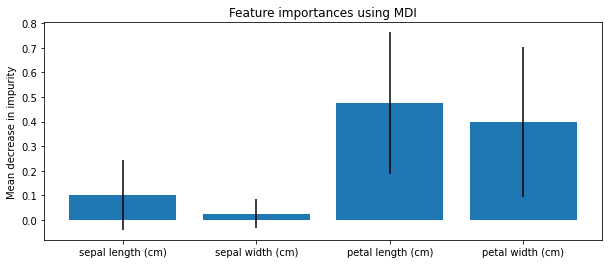

In [5]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
plt.figure(figsize=(10,4))
plt.bar(iris.feature_names, importances, yerr = std)
plt.title("Feature importances using MDI")
plt.ylabel("Mean decrease in impurity")
plt.show()

ฟีเจอร์ Petal Length และ Petal Width มีค่า Feature Importance สูงกว่าฟีเจอร์อื่น เมื่อลองมาพล็อตข้อมูลด้วยฟีเจอร์เหล่านี้ ก็จะพบว่าข้อมูลสามารถถูกแบ่งประเภทได้ง่ายกว่า เมื่อเทียบกับอีกสองฟีเจอร์

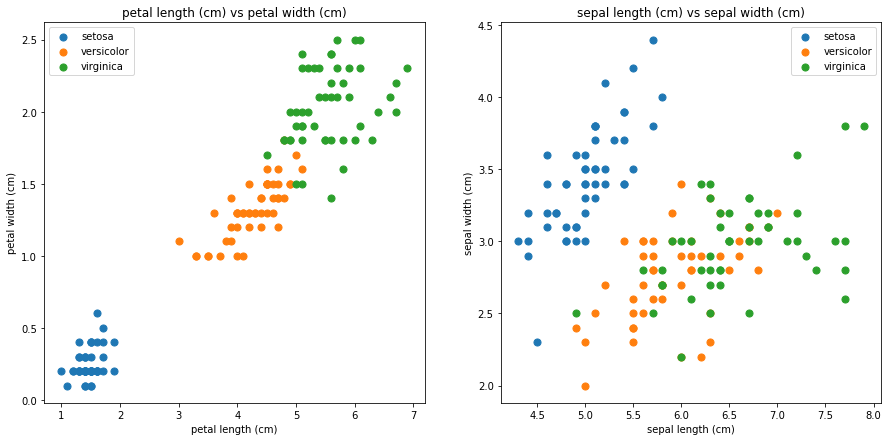

In [6]:
fig = plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1)
for i in range(3):
    plt.scatter(X[y==i, 2], X[y==i, 3], s=50, color=plt.cm.tab10(i), label=iris.target_names[i])
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title(iris.feature_names[2] + ' vs ' + iris.feature_names[3])
plt.legend()

plt.subplot(1, 2, 2)
for i in range(3):
    plt.scatter(X[y==i, 0], X[y==i, 1], s=50, color=plt.cm.tab10(i), label=iris.target_names[i])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(iris.feature_names[0] + ' vs ' + iris.feature_names[1])
plt.legend()
plt.show()

----